- ## 요약
    - 기본 모델
        1. Seq2Seq
            - 인코더, 디코더
            - Beam search
                - 과정
                - 수식
                - $B, \alpha$
                - 에러 분석
                - 번역 간 큰 차이가 없는경우의 평가
                    - Bleu
        2. Attention model
            - 수식
        3. 
        

- ### Seq2Seq
    - 문장을 분석하는 인코더, 다음문장을 예측하는 디코더 부분으로 나눈다
    - 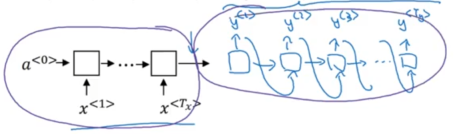
    - 이미지 입력을 인코더에 넣어 Image Captioning 에도 사용가능함
        - CNN 네트워크의 출력을 디코더에 넣어 번역함
    - 입력 문장 x 에 대해 번역된 문장 y의 조건부 확률을 구하기 떄문에 조건부 언어 모델이라고도 함
    - 번역의 일관성과 최대값을 얻기 위하여 랜덤 샘플링을 하지 않는다

    - 그리디 탐색 사용할수 없는 이유
        - 그리디는 개별적인 단어 확률이 가장 높은 단어를 선택함
        - 일반적으로 많이 나오는 단어가 더 높은 확률이 나오기 떄문에 적절하지 않은 번역이 나올수 있음
    
    - Beam search
        - 가능성이 있는 후보 B개를 유지하여 탐색하는 방법임

        - 과정
            1. **첫 번째 단어 예측**  
                - 일반적인 인코더-디코더 과정으로 첫 번째 단어 \( \hat{y}_1 \) 예측  
            2. **확률이 높은 \( B \) 개의 단어 선택**  
                - \( B \) 개의 가장 확률이 높은 단어 후보를 유지  
            3. **선택된 \( B \) 개의 단어 각각에 대해 다음 단어 예측**  
                - 각 후보 단어에 대해 디코더를 실행하여 다음 단어의 확률 분포 계산  
            4. **전체 확률 계산 후, 상위 \( B \) 개의 문장 선택**  
                - 각 문장의 로그 확률 \( \log P(y | x) \) 를 계산하여 가장 높은 \( B \) 개의 문장 유지  
            5. **\<EOS\> (End of Sentence) 토큰이 나올 때까지 반복**  
                - 완전한 문장이 생성될 때까지 반복하며 최적 문장 선택  
        - 수식
            - $ \underset{y}{\arg\max} \sum_{y=1}^{T_y} \log P(y^{\langle t \rangle} | x, y^{\langle 1 \rangle}, ..., y^{\langle t-1 \rangle}) $

                - 실제 수식은 이것이나 0보다 작은 곱의 형태로 나타나기 떄문에 매우 작은 값이 되는 경우가 많아 안정화 위해 로그값을 취해 계산함
                - 문장이 길어질수록 확률이 낮아지므로 문장을 짧게 만드는 경향 생겨남
            - $ \underset{y}{\arg\max} \sum\limits_{y=1}^{T_y} \log P(y^{\langle t \rangle} | x, y^{\langle 1 \rangle}, ..., y^{\langle t-1 \rangle}) $
                - $T_y^\alpha$ 로 나눠 정규화해서 긴 문장에 대한 페널티를 낮출수 있음
                    - $\alpha$ 는 하이퍼파라미터임

        - B의 크기에 따라 연산량 차이가 크나 높은 값에선 큰 차이 없으므로 적정값 설정

        - 에러 분석
            - 인간의 답안을 $y^*$, 신경망의 추정을 $\hat{y}$ 라 할떄
            - $y^* > \hat{y}$ 일 경우
                - $ P(y^* | x) > P(\hat{y} | x) $
                    - 인간의 추정이 더 좋음
                    - 빔 탐색 자체가 실패했음을 알수있음
                - $ P(y^* | x) \leq P(\hat{y} | x) $
                    - $y^*$ 가 더 좋으나 RNN 은 반대로 추정함
                    - RNN에 문제가 있음을 알수있음

        - 기계번역값 케이스 사이에 큰 점수차가 없는 경우의 평가
            - Bleu
                - 기계 번역과 인간 번역의 유사도를 측정하여 길이 페널티를 더해 평가함
                - n 개의 연속된 단어 n-gram 에 대해 가설문장과 유사도를 평가함
                - 길이 페널티 BP 를 더함
                - 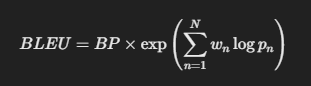
                - 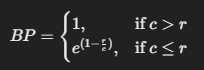
                - $p_n= $ 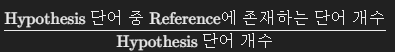

- ## Attention model
    - seq2seq 모델은 긴 문장 처리시 뒷부분 정보 손실이 발생하여 성능저하가 일어남
    - 디코더가 단어를 예측 시, 특정 부분을 강조하는 방식으로 작동시킴
        - 각 인코더 단어가 얼마나 중요한지 계산하는 가중치 부여
    - 문장의 특정 부분을 중요하게 여겨 이해한다 생각하면됨


    - BRNN 의 출력에 가중치를 매겨 이전 단어의 추정과 함께 다음 단어 예측을 수행한다
    - 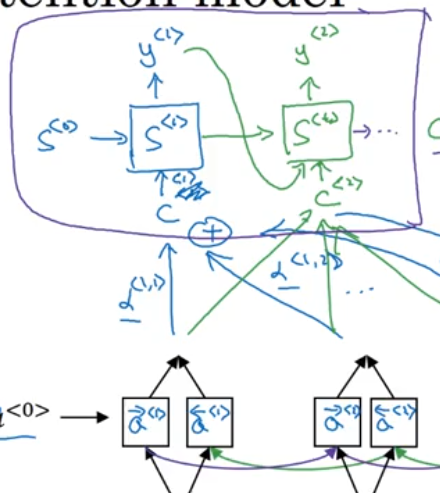
    - 수식
        - 입력 문장을 $t^`$, 인코더 BRNN을 $a^{\langle t \rangle} = (\overrightarrow{a}^{\langle t \rangle}, \overleftarrow{a}^{\langle t \rangle})$ 라 함
        - 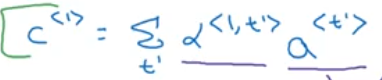
            - $\alpha^{t,t`}$ 은 $t$ 번째 단어예측을 할떄의 $t^`$ 번쨰 BRNN 인덱스의 가중치임
            - $y^{<t>}$ 에 대한 $a^{<t^`>}$ 가중치
            

        - 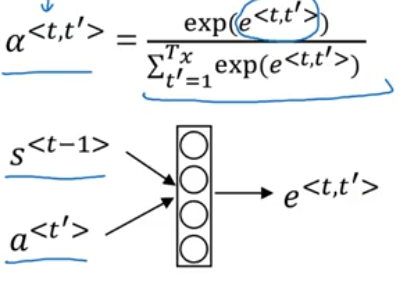
            - 디코더 이전 은닉층과, $t^`$ 인덱스의 brnn 출력값의 유사도를 비교한 값이 $e^{<t,t^`>}$ 임

- ## Seq2Seq 실 적용
    - 음성 인식
        - CTC cost
            - 음성 인식은 입력 데이터가 출력값보다 매우 긴 특징을 가짐
            - 연산 과정에서 입력길이를 줄여야 할 필요가 있음

            - 과정
                1. 출력에 공백을 추가하여 다양한 정렬 형태를 고려함
                2. 입력시퀸스가 특정 출력값을 만들수 있는 공백 포함 문자열을 고려하여 합산
                3. 이 확률을 모두 합산하여 최종확률 계산함
            - 예시 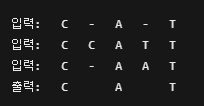

    - 트리거 워드 감지
        - 입력 음성에 트리거 워드 입력시 1출력하는 형태로 RNN 만듬
            - 1의 값이 매우 적어서 앞뒤의 값 또한 1로 만드는 방법 있음
            